In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('taxi_trip_pricing.csv')

In [67]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [127]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,1000.000000,950.000000,950.000000,950.000000,950.000000,950.000000,1000.000000
mean,27.008520,2.476842,3.502989,1.233316,0.292916,62.118116,56.541560
std,19.402661,1.102249,0.870162,0.429816,0.115592,32.154406,39.492129
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,13.107500,1.250000,2.730000,0.860000,0.190000,35.882500,34.578850
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,37.782500,3.000000,4.260000,1.610000,0.390000,89.055000,67.476650
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [73]:
print("Missing Values:", df.isnull().sum())

Missing Values: Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64


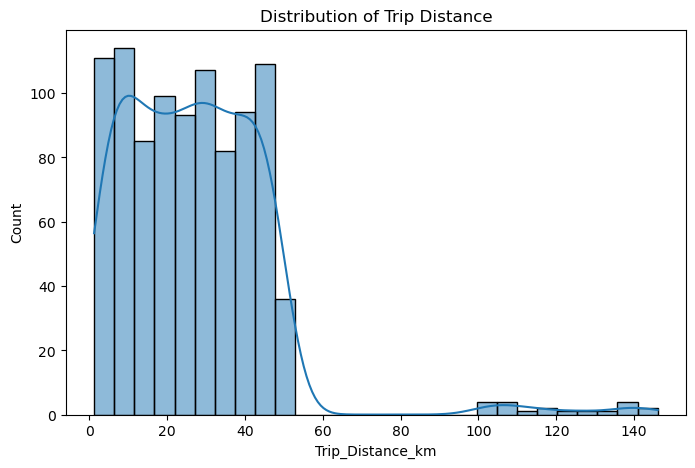

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Trip_Distance_km'], kde=True)
plt.title('Distribution of Trip Distance')
plt.show()

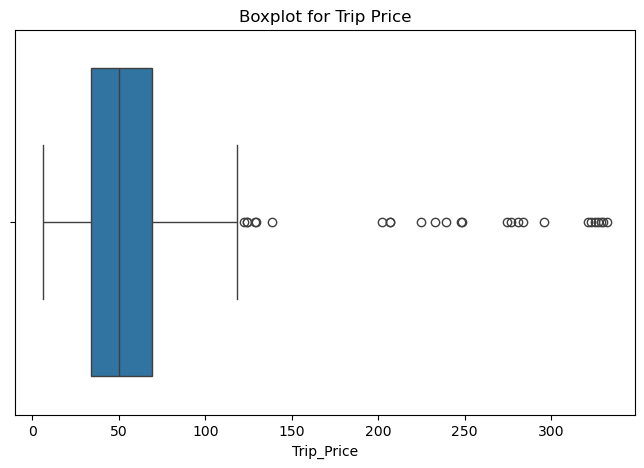

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Trip_Price'])
plt.title('Boxplot for Trip Price')
plt.show()

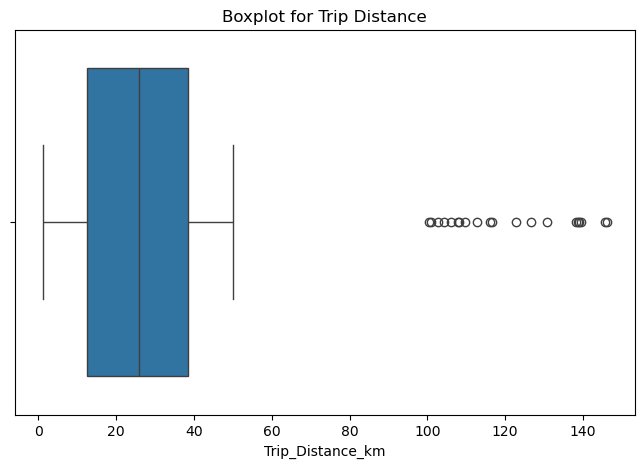

In [77]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Trip_Distance_km'])
plt.title('Boxplot for Trip Distance')
plt.show()

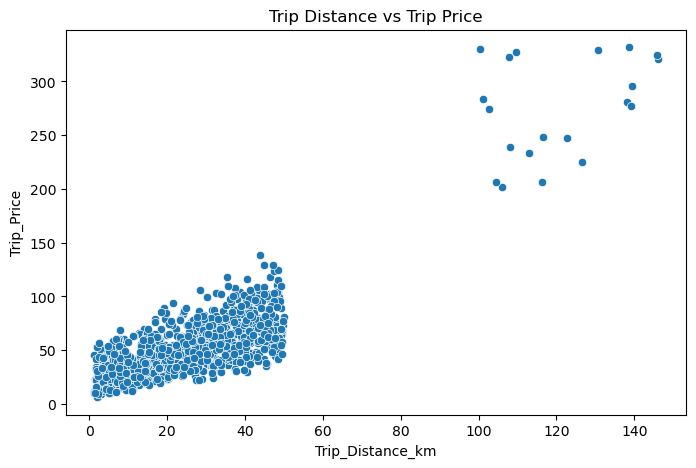

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Trip_Distance_km'], y=df['Trip_Price'])
plt.title('Trip Distance vs Trip Price')
plt.show()

In [79]:
correlation = df['Trip_Distance_km'].corr(df['Trip_Price'])
print("\nCorrelation Matrix:\n", correlation)


Correlation Matrix:
 0.8491226112062743


In [81]:
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True)

In [83]:
df.isnull().sum()

Trip_Distance_km          0
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price                0
dtype: int64

In [89]:
Q1 = df[['Trip_Distance_km', 'Trip_Price']].quantile(0.25)
Q3 = df[['Trip_Distance_km', 'Trip_Price']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[~((df[['Trip_Distance_km', 'Trip_Price']] < lower_bound) | (df[['Trip_Distance_km', 'Trip_Price']] > upper_bound)).any(axis=1)]

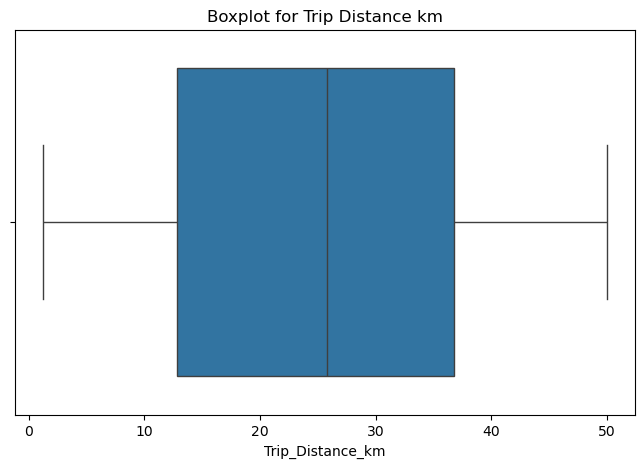

In [91]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['Trip_Distance_km'])
plt.title('Boxplot for Trip Distance km')
plt.show()

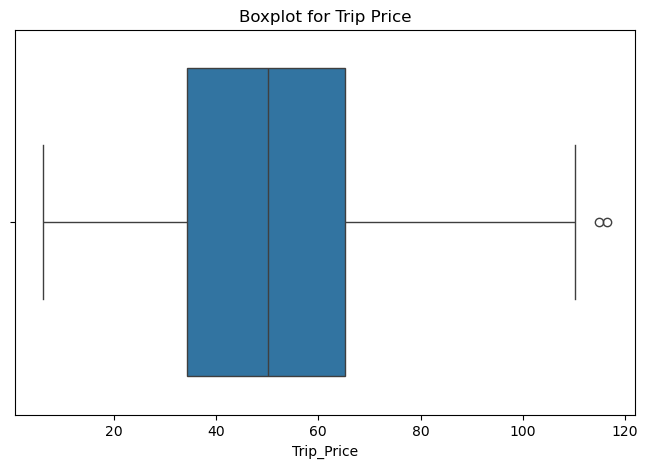

In [35]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['Trip_Price'])
plt.title('Boxplot for Trip Price')
plt.show()

In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
df_no_outliers['Trip_Distance_km'] = scaler.fit_transform(df_no_outliers[['Trip_Distance_km']])
df_no_outliers['Trip_Price'] = scaler.fit_transform(df_no_outliers[['Trip_Price']])

In [97]:
X = df_no_outliers[['Trip_Distance_km']] 
y = df_no_outliers['Trip_Price']

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
from sklearn.metrics import mean_squared_error

In [119]:
y_pred = model.predict(X_test)

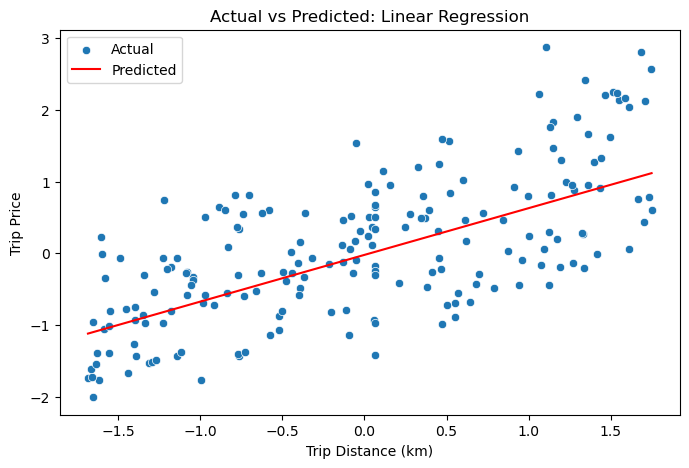

In [123]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Trip_Distance_km'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Trip_Distance_km'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Trip Distance (km)")
plt.ylabel("Trip Price")
plt.title("Actual vs Predicted: Linear Regression")
plt.legend()
plt.show()

In [125]:
print(f"\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")


Model Coefficients:
Intercept: -0.02
Coefficient: 0.65
